In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [13]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [14]:
# Basic statistics for numeric columns in Products and Transactions
print("Products - Basic Statistics:")
print(products.describe())
print("\nTransactions - Basic Statistics:")
print(transactions.describe())

Products - Basic Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions - Basic Statistics:
                     TransactionDate     Quantity   TotalValue       Price  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

       TransactionYear  
count      1000.000000  
mean       2023.996000

In [15]:
# Top regions by customer count
top_regions = customers['Region'].value_counts()
print("\nCustomers by Region:")
print(top_regions)


Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [16]:
# Top product categories by count and revenue
top_categories = products['Category'].value_counts()
category_revenue = transactions.merge(products, on="ProductID").groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

print("\nTop Product Categories by Count:")
print(top_categories)
print("\nRevenue by Product Category:")
print(category_revenue)


Top Product Categories by Count:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [17]:
# Monthly trend of transactions
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('Month')['TransactionID'].count()

print("\nMonthly Transactions Trend:")
print(monthly_transactions)


Monthly Transactions Trend:
Month
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64


In [18]:
# Visualize the trends
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<ipython-input-19-d67680918ee9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette="viridis")


([0, 1, 2, 3],
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Asia')])

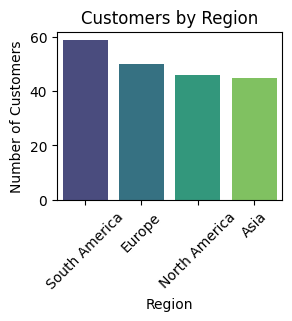

In [19]:
# Customers by Region
plt.subplot(2, 2, 1)
sns.barplot(x=top_regions.index, y=top_regions.values, palette="viridis")
plt.title("Customers by Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

<ipython-input-20-eff8aeb564e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="coolwarm")


([0, 1, 2, 3],
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Home Decor')])

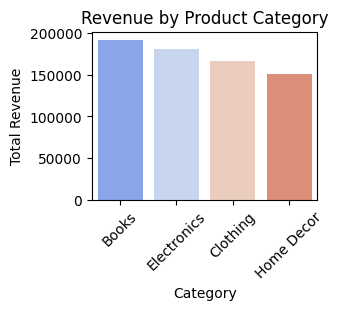

In [20]:
# Top Categories by Revenue
plt.subplot(2, 2, 2)
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="coolwarm")
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

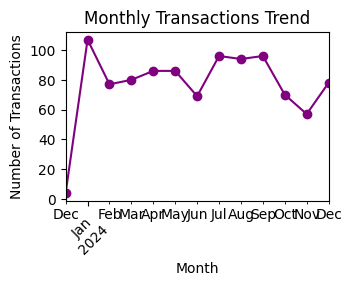

In [21]:
# Monthly Transactions Trend
plt.subplot(2, 2, 3)
monthly_transactions.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Transactions Trend")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()